<a href="https://colab.research.google.com/github/Ahmed-Elshoubashy/Stereo-Vision/blob/main/Stereo_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount the drive to get the images**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Required imports**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import csv
import matplotlib.image as mpimg

**Read the images as gray scale images and show them**

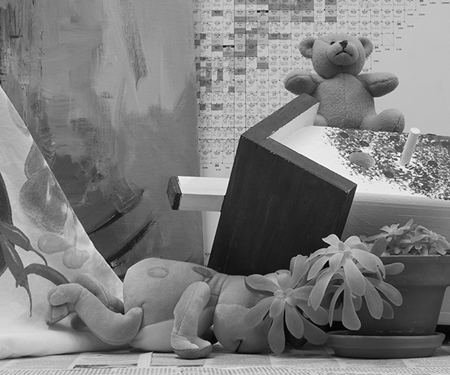

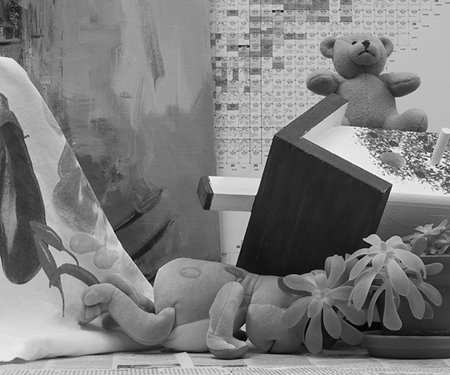

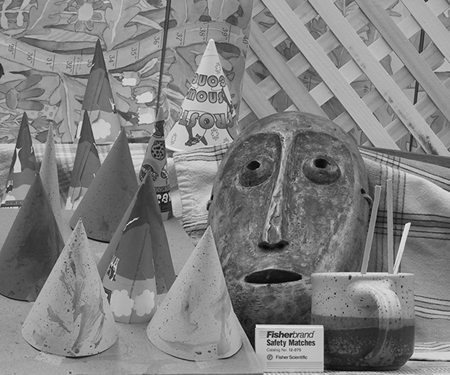

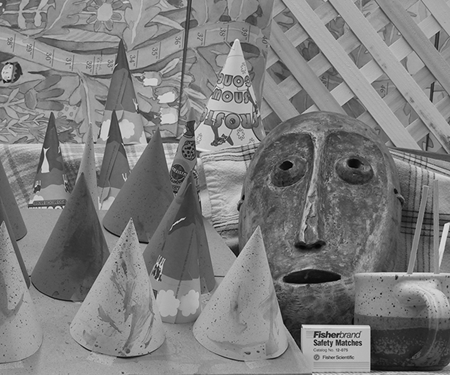

In [ ]:
img1 = cv2.imread('drive/MyDrive/CV_datasets/img2.png', cv2.IMREAD_GRAYSCALE) # read image
img2 = cv2.imread('drive/MyDrive/CV_datasets/img1.png', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('drive/MyDrive/CV_datasets/img4.png', cv2.IMREAD_GRAYSCALE) # read image
img4 = cv2.imread('drive/MyDrive/CV_datasets/img3.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)
cv2_imshow(img4)

**Print the shape of each image**

In [ ]:
print(img1.shape)
print(img2.shape)
print(img3.shape)
print(img4.shape)

(375, 450)
(375, 450)
(375, 450)
(375, 450)


**Block matching function**

In [ ]:
def block_matching(img1,img2,window_size,simalrity_measure,max = img1.shape[1]//8):
  rows = img2.shape[0]
  cols = img2.shape[1]
  output = np.zeros((rows,cols))
  w_half = window_size // 2
  for i in range(w_half,rows-w_half):
    for j in range(w_half,cols-w_half):
      window = img1[i-w_half:i+w_half+1,j-w_half:j+w_half+1]
      min_value = -1
      index = -1
      for k in range(0,min(max,(cols - w_half - j))):
        if(simalrity_measure == 0):
          sub = np.sum(np.abs(img2[i-w_half:i+w_half+1,j-w_half+k:j+w_half+k+1]-window))
        else :
          sub = np.sum((img2[i-w_half:i+w_half+1,j-w_half+k:j+w_half+k+1] - window)**2)
        if(min_value > sub or min_value == -1):
          min_value = sub
          index = k
      output[i][j] = (index*255/max)
  return output

**ASD**

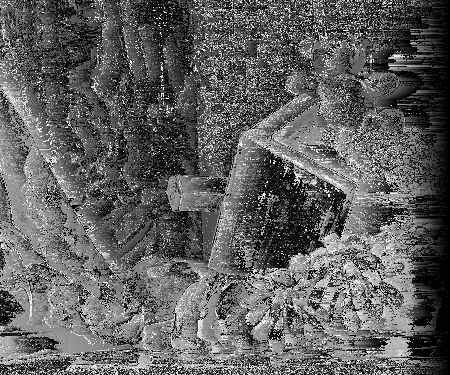

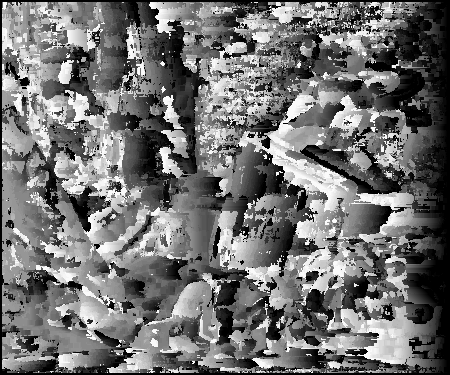

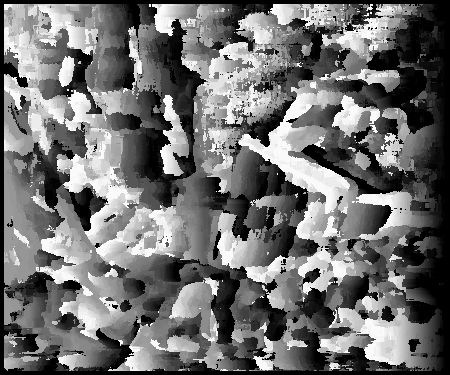

In [ ]:
cv2_imshow(block_matching(img1,img2,1,0))
cv2_imshow(block_matching(img1,img2,5,0))
cv2_imshow(block_matching(img1,img2,9,0))

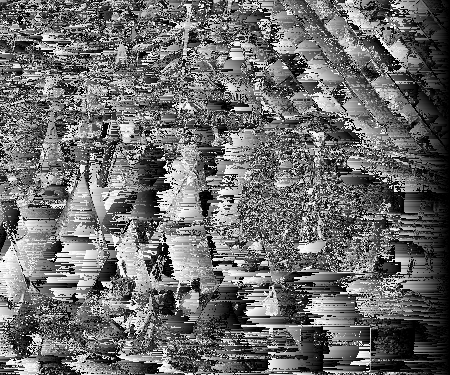

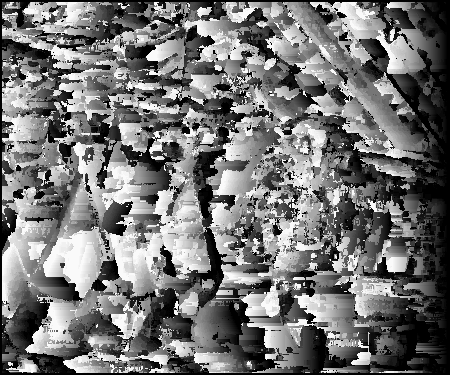

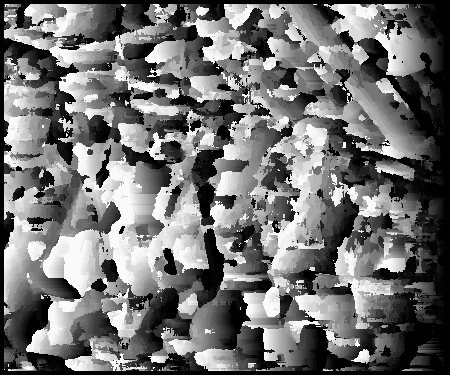

In [ ]:
cv2_imshow(block_matching(img4,img3,1,0))
cv2_imshow(block_matching(img4,img3,5,0))
cv2_imshow(block_matching(img4,img3,9,0))

**SSD**

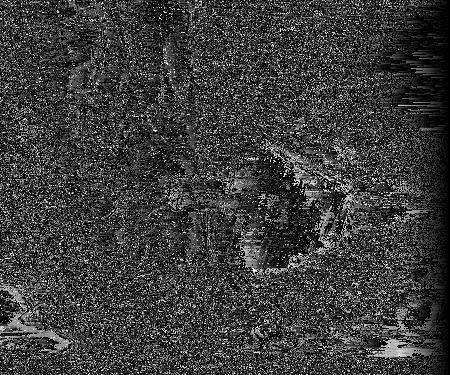

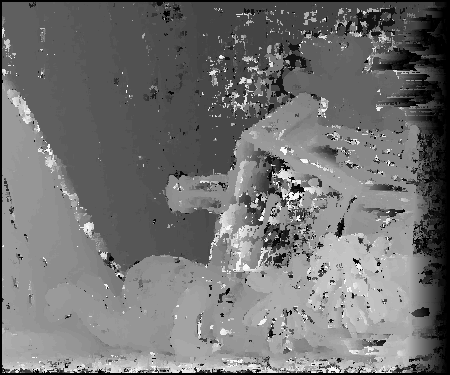

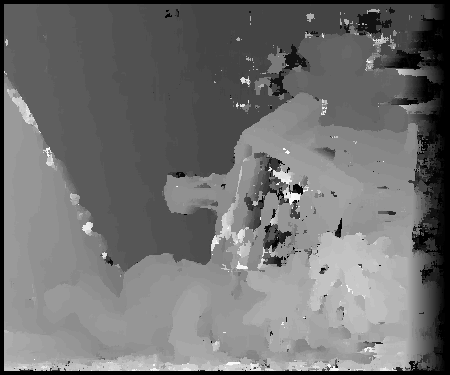

In [ ]:
cv2_imshow(block_matching(img1,img2,1,1))
cv2_imshow(block_matching(img1,img2,5,1))
cv2_imshow(block_matching(img1,img2,9,1))

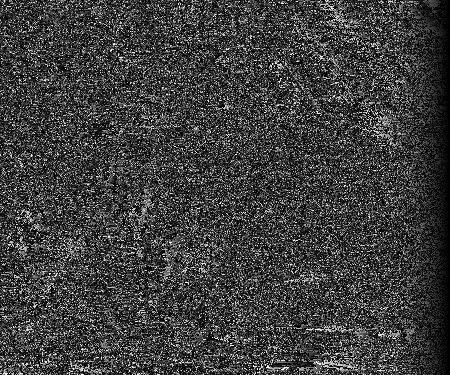

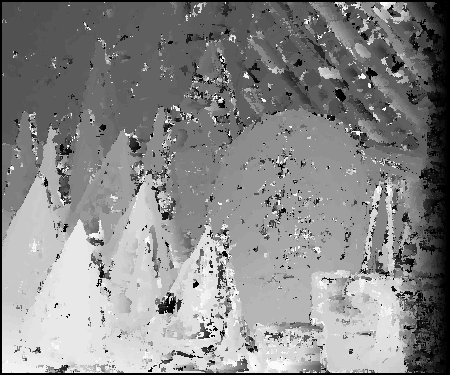

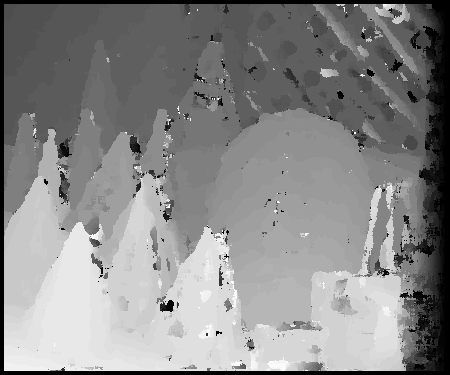

In [ ]:
cv2_imshow(block_matching(img3,img4,1,1))
cv2_imshow(block_matching(img3,img4,5,1))
cv2_imshow(block_matching(img3,img4,9,1))

**Recursive dynamic programming function**

In [ ]:
def dpR(img1,img2,c0,sigma,dp,l,r,row):
  if (l == 0 or r == 0 or dp[l][r] != 0):
    return dp[l][r]
  cost = (float(img1[row][l]) - float(img2[row][r]))**2 /(sigma**2)
  dp[l][r] = min(dpR(img1,img2,c0,sigma,dp,l-1,r-1,row)+cost,min(dpR(img1,img2,c0,sigma,dp,l-1,r,row),dpR(img1,img2,c0,sigma,dp,l,r-1,row))+c0)
  return dp[l][r]

**Dynamic programming function**

In [ ]:
def dynamic_programming(img1,img2,c0 = 1,sigma = 2):
  rows = img1.shape[0]
  cols = img1.shape[1]
  output = np.zeros((rows,cols),dtype = np.float128)
  for i in range(rows):
    dp = np.zeros((cols,cols),dtype = np.float128)
    for(j)in range(cols):
      dp[0][j] = (j+1)*c0
      dp[j][0] = (j+1)*c0
    dp[0][0] = (float(img1[i][0]) - float(img2[i][0]))**2 /(sigma**2)
    dpR(img1,img2,c0,sigma,dp,cols-1,cols-1,i)
    r = cols - 1
    c = cols - 1
    while (r > 0 and c > 0):
      cost = (float(img1[i][r]) - float(img2[i][c]))**2 /(sigma**2)
      if dp[r][c] == dp[r-1][c-1] + cost:
          output[i][r] = abs(r - c)
          r -= 1
          c -= 1
      elif r != 0 and dp[r][c] == dp[r-1][c] + c0:
        r -= 1
      elif c != 0 and dp[r][c] == dp[r][c-1] + c0:
        c -= 1
  return output * 255 / np.max(output)

**Calling the dynamic programming**

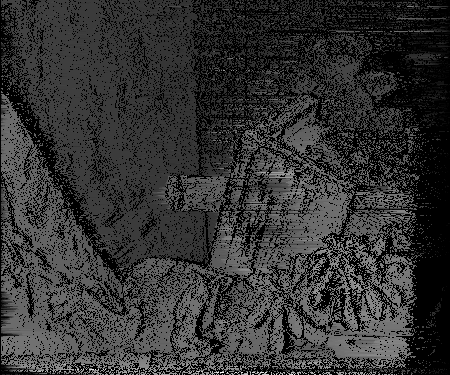

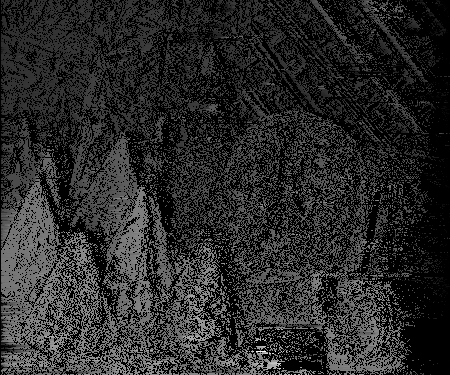

In [ ]:
output_image = dynamic_programming(img1,img2)
cv2_imshow(output_image)
output_image = dynamic_programming(img3,img4)
cv2_imshow(output_image)